In [1]:
# -------------------------------
# SIMULATE QUBIT MEASUREMENTS
# -------------------------------

import numpy as np                
import pandas as pd               
import matplotlib.pyplot as plt   


np.random.seed(42)

# random quantum states to simulate
n_samples = 5000

# noise added to each measurement
noise_std = 0.05

# -------------------------------
# Generate True Quantum States
# -------------------------------

# Sample theta (polar angle) values between 0 and pi
theta = np.random.uniform(0, np.pi, n_samples)

# Sample phi (azimuthal angle) values between 0 and 2*pi
phi = np.random.uniform(0, 2 * np.pi, n_samples)

# Convert (theta, phi) into Bloch vector coordinates (x, y, z)
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

# -------------------------------
# Add Noise to Simulate Measurements
# -------------------------------

# Add noise in measurements
x_noisy = x + np.random.normal(0, noise_std, n_samples)
y_noisy = y + np.random.normal(0, noise_std, n_samples)
z_noisy = z + np.random.normal(0, noise_std, n_samples)

# Normalize vectors 
norms = np.sqrt(x_noisy**2 + y_noisy**2 + z_noisy**2)
x_noisy /= norms
y_noisy /= norms
z_noisy /= norms

# -------------------------------
# Create Dataset
# -------------------------------

# Compress measurements into a DataFrame
# Each row represents one qubit sample
data = pd.DataFrame({
    'sigma_x': x_noisy,   # Noisy measurement of <sigma_x>
    'sigma_y': y_noisy,   # Noisy measurement of <sigma_y>
    'sigma_z': z_noisy,   # Noisy measurement of <sigma_z>
    'theta': theta,       # Ground truth polar angle (target for training)
    'phi': phi            # Ground truth azimuthal angle (target for training)
})

print("Sample data:")
print(data.head())

# -------------------------------
# Save Dataset to CSV
# -------------------------------

# file contains 5000 rows and 5 columns
data.to_csv('qubit_measurements.csv', index=False)
print("\nSaved dataset to 'qubit_measurements.csv'")

Sample data:
    sigma_x   sigma_y   sigma_z     theta       phi
0 -0.778195  0.525444  0.343977  1.176652  2.473285
1 -0.202425  0.020035 -0.979093  2.986757  2.974684
2  0.473190 -0.514778 -0.714909  2.299627  5.369280
3 -0.534334  0.778968 -0.328171  1.880741  2.136311
4  0.353171 -0.398269  0.846553  0.490147  5.464170

Saved dataset to 'qubit_measurements.csv'


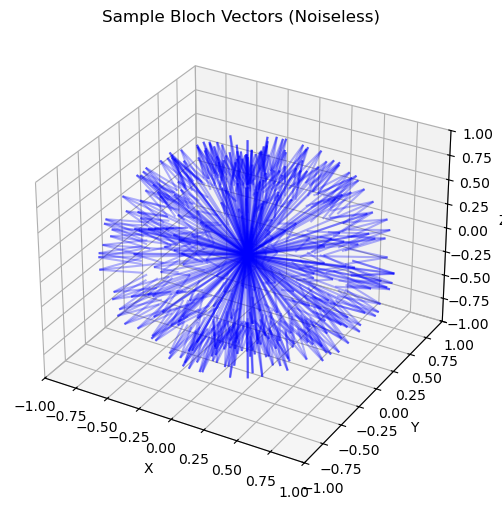

In [2]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, x[:300], y[:300], z[:300], length=1.0, normalize=True, color='blue', alpha=0.3)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Sample Bloch Vectors (Noiseless)')
plt.show()